In [1]:
import pyerrors as pe
import numpy as np
import matplotlib.pyplot as plt
from packaging import version
if version.parse(pe.__version__) < version.parse("2.6.0"):
    raise Exception(f"v2.6.0 or newer is required for this example, you are using {pe.__version__}")

In [2]:
x_test = {'a':[0,1,2,3,4,5],'b':[0,1,2,3,4,5]}
y_test = {'a':[pe.Obs([np.random.normal(i, i*1.5, 1000)],['ensemble1']) for i in range(1,7)],
          'b':[pe.Obs([np.random.normal(val, val*1.5, 1000)],['ensemble1']) for val in [1.0,2.5,4.0,5.5,7.0,8.5]]}
for key in y_test.keys():
    [item.gamma_method() for item in y_test[key]]

In [3]:
def func_a(a, x):
    return a[1] * x + a[0]

def func_b(a, x):
    return a[2] * x + a[0]

funcs_test = {"a": func_a,"b": func_b}

In [4]:
output_test = pe.fits.least_squares(x_test,y_test,funcs_test,method='migrad',expected_chisquare=True)

Fit with 3 parameters
Method: migrad
Optimization terminated successfully.
chisquare/d.o.f.: 0.8085703524653507
fit parameters [0.97737577 1.01063624 1.47900852]
chisquare/expected_chisquare: 0.8121288230401409


In [5]:
output_test.gamma_method()

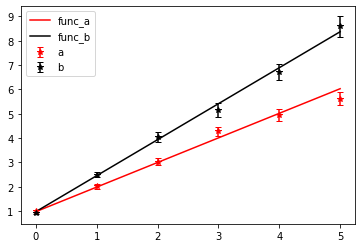

In [6]:
colour= {'a':'red','b':'black'}
plt.figure()
for key in funcs_test.keys():
    plt.errorbar(x_test[key],[o.value for o in y_test[key]],ls='none',marker='*',color=colour[key],yerr=[o.dvalue for o in y_test[key]],capsize=3,label=key)
    plt.plot([x_val for x_val in x_test[key]],[funcs_test[key](output_test.fit_parameters,x_val) for x_val in x_test[key]],color=colour[key],label='func_'+key)
plt.legend()
plt.show()